In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report

In [31]:
df = pd.read_csv(r"DataSets\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
df.dropna(inplace=True)
df.drop_duplicates()

zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for i in zero:
  mean = int(df[i].mean(skipna=True))
  df[i] = df[i].replace(0, np.nan)
  df[i] = df[i].replace(np.nan, mean)

df = df[df["Pregnancies"]<13]

df = df[df["SkinThickness"]<99]

df = df[(df['BMI']>15)&(df['BMI']<45)]

df.reset_index(drop=True, inplace=True)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,3.680614,120.898187,71.627615,25.815900,117.584379,31.548117,0.468960,32.966527,0.329149
std,3.089869,30.263682,11.742915,8.939406,92.336978,5.861837,0.325458,11.810255,0.470232
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.000000,79.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,22.000000,79.000000,31.600000,0.374000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,126.000000,35.600000,0.624000,40.000000,1.000000
max,12.000000,199.000000,122.000000,54.000000,846.000000,44.600000,2.329000,81.000000,1.000000


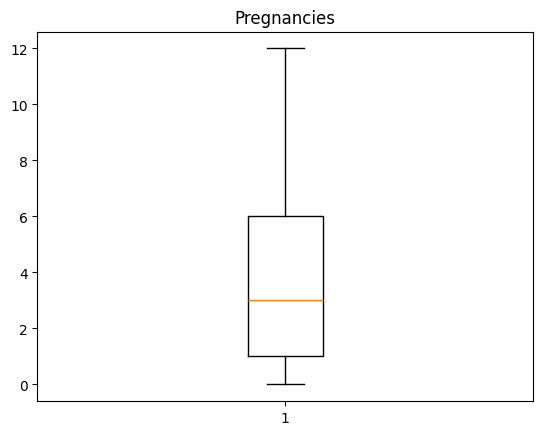

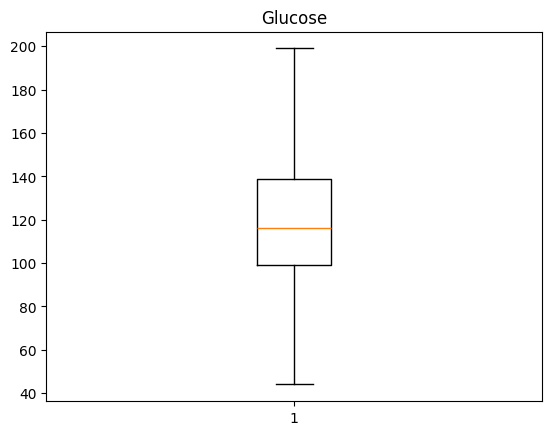

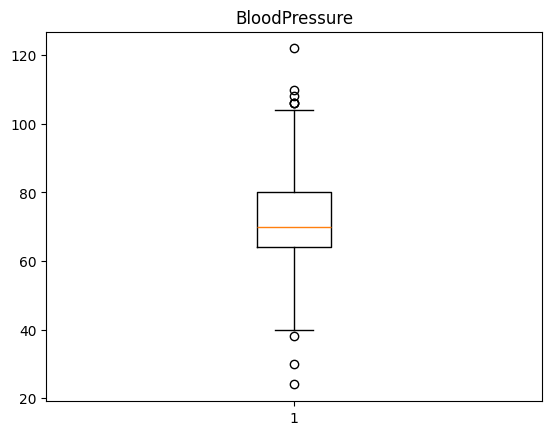

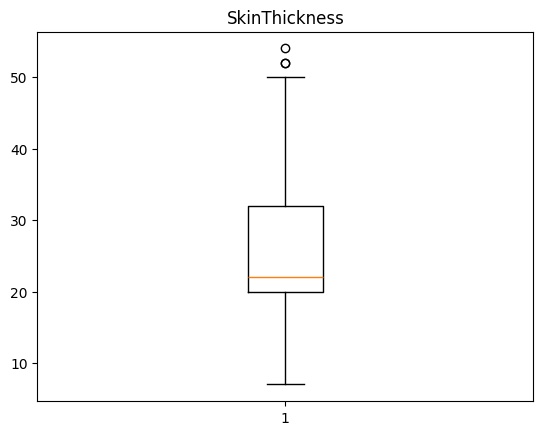

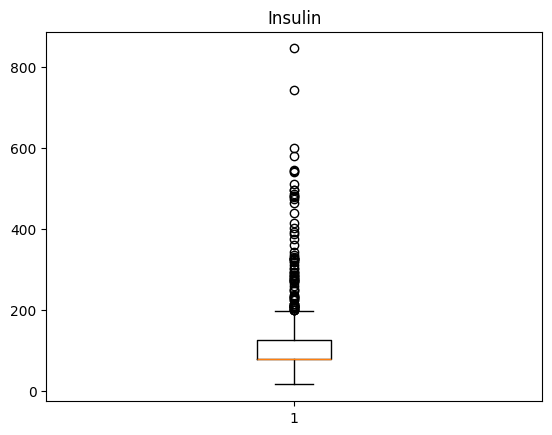

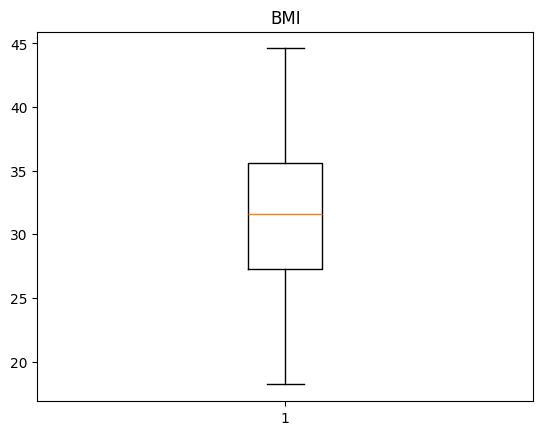

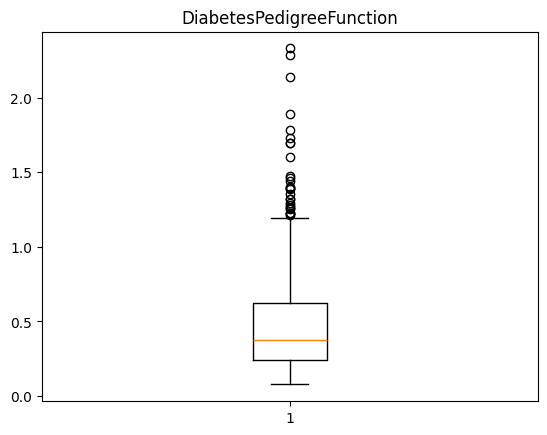

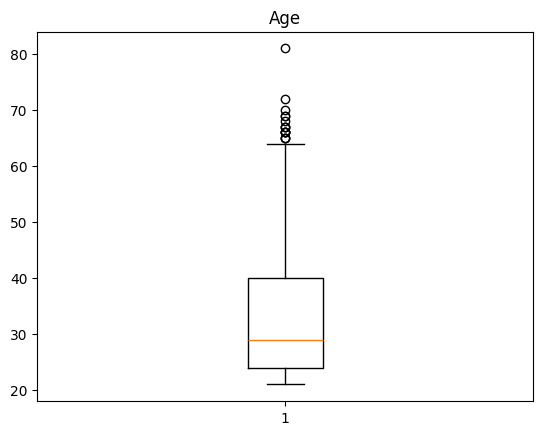

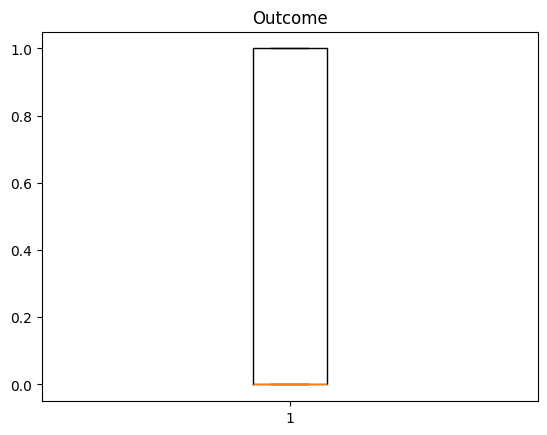

In [33]:
for i in df:
  plt.boxplot(df[i])
  plt.title(i)
  plt.show()
  print()

In [34]:
x = df.drop(columns=["Outcome"])
y = df["Outcome"]

In [35]:
smote = SMOTE()
x_res,y_res = smote.fit_resample(x,y)

In [36]:
mms = MinMaxScaler()
x_scaled = mms.fit_transform(x_res)

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_res,test_size=0.4,random_state=2)

In [38]:
models = [KNeighborsClassifier(),SVC(),GaussianNB(),DecisionTreeClassifier()]

for i in models:
  print(i)
  i.fit(x_train,y_train)
  y_pred = i.predict(x_test)
  print(classification_report(y_test,y_pred))
  print()

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       190
           1       0.73      0.84      0.78       195

    accuracy                           0.76       385
   macro avg       0.77      0.76      0.76       385
weighted avg       0.77      0.76      0.76       385


SVC()
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       190
           1       0.77      0.83      0.80       195

    accuracy                           0.79       385
   macro avg       0.79      0.79      0.79       385
weighted avg       0.79      0.79      0.79       385


GaussianNB()
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       190
           1       0.78      0.68      0.73       195

    accuracy                           0.74       385
   macro avg       0.75      0.74      0.74       385
weighted avg       0.75      0

In [39]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [40]:
x_train.shape

(577, 8)

In [41]:
model = Sequential([Dense(28,activation="relu",input_shape=(8,)),
                    Dense(64,activation="relu"),
                    Dense(2,activation="softmax")])

c:\Users\vaisa\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [43]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5755 - loss: 0.6796   
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5711 - loss: 0.6682 
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6232 - loss: 0.6547 
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6953 - loss: 0.6385 
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7192 - loss: 0.6289 
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7141 - loss: 0.6182 
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7056 - loss: 0.6025 
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6992 - loss: 0.5911 
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7349 - loss: 0.5724 
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7062 - loss: 0.5722 
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7469 - loss: 0.5557 
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

In [44]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 28)             │           252 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         1,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,716 (26.24 KB)

 Trainable params: 2,238 (8.74 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,478 (17.50 KB)

In [ ]:
y_pred = model.predict(x_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[0.5523972 , 0.44760272],
       [0.85381556, 0.14618441],
       [0.6669419 , 0.33305812],
       [0.13699639, 0.8630036 ],
       [0.7065641 , 0.29343578],
       [0.08096145, 0.91903853],
       [0.6181697 , 0.38183028],
       [0.0836117 , 0.91638833],
       [0.47958314, 0.5204168 ],
       [0.928502  , 0.07149795],
       [0.2385986 , 0.7614015 ],
       [0.59656066, 0.4034393 ],
       [0.14830466, 0.85169536],
       [0.13209753, 0.86790246],
       [0.0410283 , 0.95897174],
       [0.31616983, 0.68383014],
       [0.46493334, 0.53506666],
       [0.12569453, 0.8743055 ],
       [0.5686307 , 0.43136927],
       [0.5846109 , 0.4153891 ],
       [0.36045158, 0.6395485 ],
       [0.41110212, 0.5888979 ],
       [0.89680105, 0.10319892],
       [0.92755324, 0.07244677],
       [0.78653073, 0.21346925],
       [0.95055693, 0.04944307],
       [0.07935949, 0.9206406 ],
       [0.857267  , 0.142733  ],
       [0.8615238 , 0.13847621],
       [0.2014113 , 0.7985887 ],
       [0.

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74       190
           1       0.75      0.76      0.76       195

    accuracy                           0.75       385
   macro avg       0.75      0.75      0.75       385
weighted avg       0.75      0.75      0.75       385

